In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# 수치형 변환
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# PCA (차원 축소 : 주성분분석)
from sklearn.decomposition import PCA

# 문제지, 답안지 분리
from sklearn.model_selection import train_test_split

# 회귀 모델 (+ 통계)
# from sklearn.linear_model import LogisticRegression --> 분류 모델 / 회귀 XXXXXXXX
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 외부(Google) 회귀모델 (+ 별도설치 )
# import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 정규화 / 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 교차 검증 : StratifiedKFold (y를 고르게 폴드에 분배한다는 것은 회귀에서 없다) 
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

# 회귀 평가 매트릭스
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# matplotlib 차트 스타일을 seaborn 스타일로 설정
sns.set()

# ----------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [24]:
df = pd.read_csv('../data/train.csv')
df.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [25]:
df = df.drop('id', axis=1)
df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']
df.head()

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rs      524164 non-null  float64
 1   al      524164 non-null  float64
 2   vc      524164 non-null  float64
 3   aq      524164 non-null  float64
 4   is      524164 non-null  float64
 5   lpl     524164 non-null  float64
 6   ms      524164 non-null  float64
 7   tdm     524164 non-null  float64
 8   e       524164 non-null  float64
 9   bpm     524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


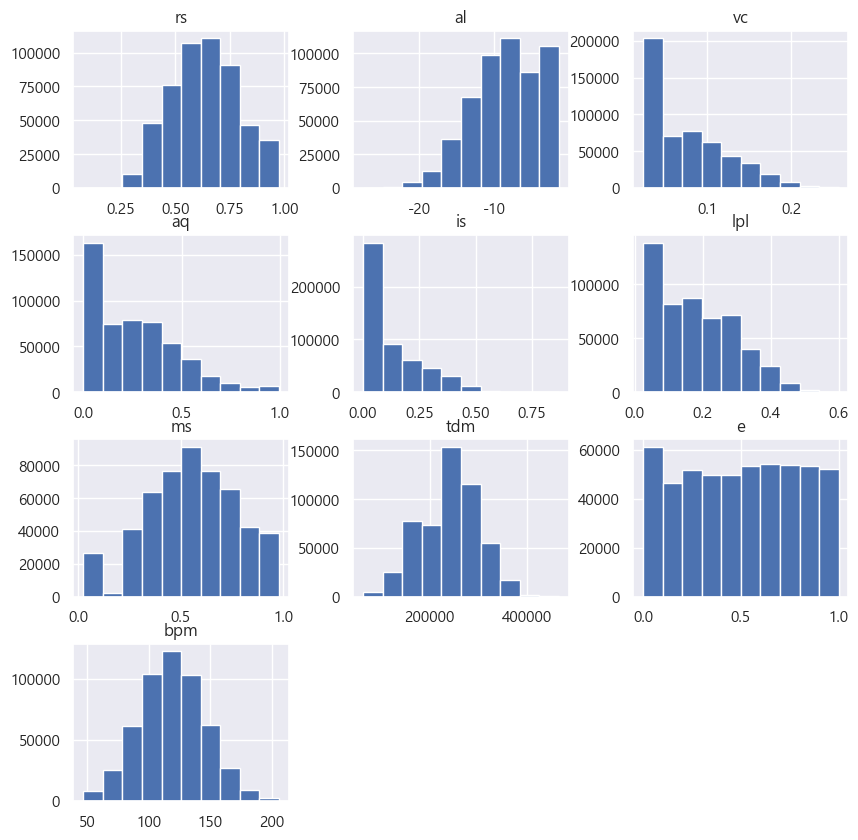

In [27]:
df.hist(figsize=(10, 10))
plt.show()

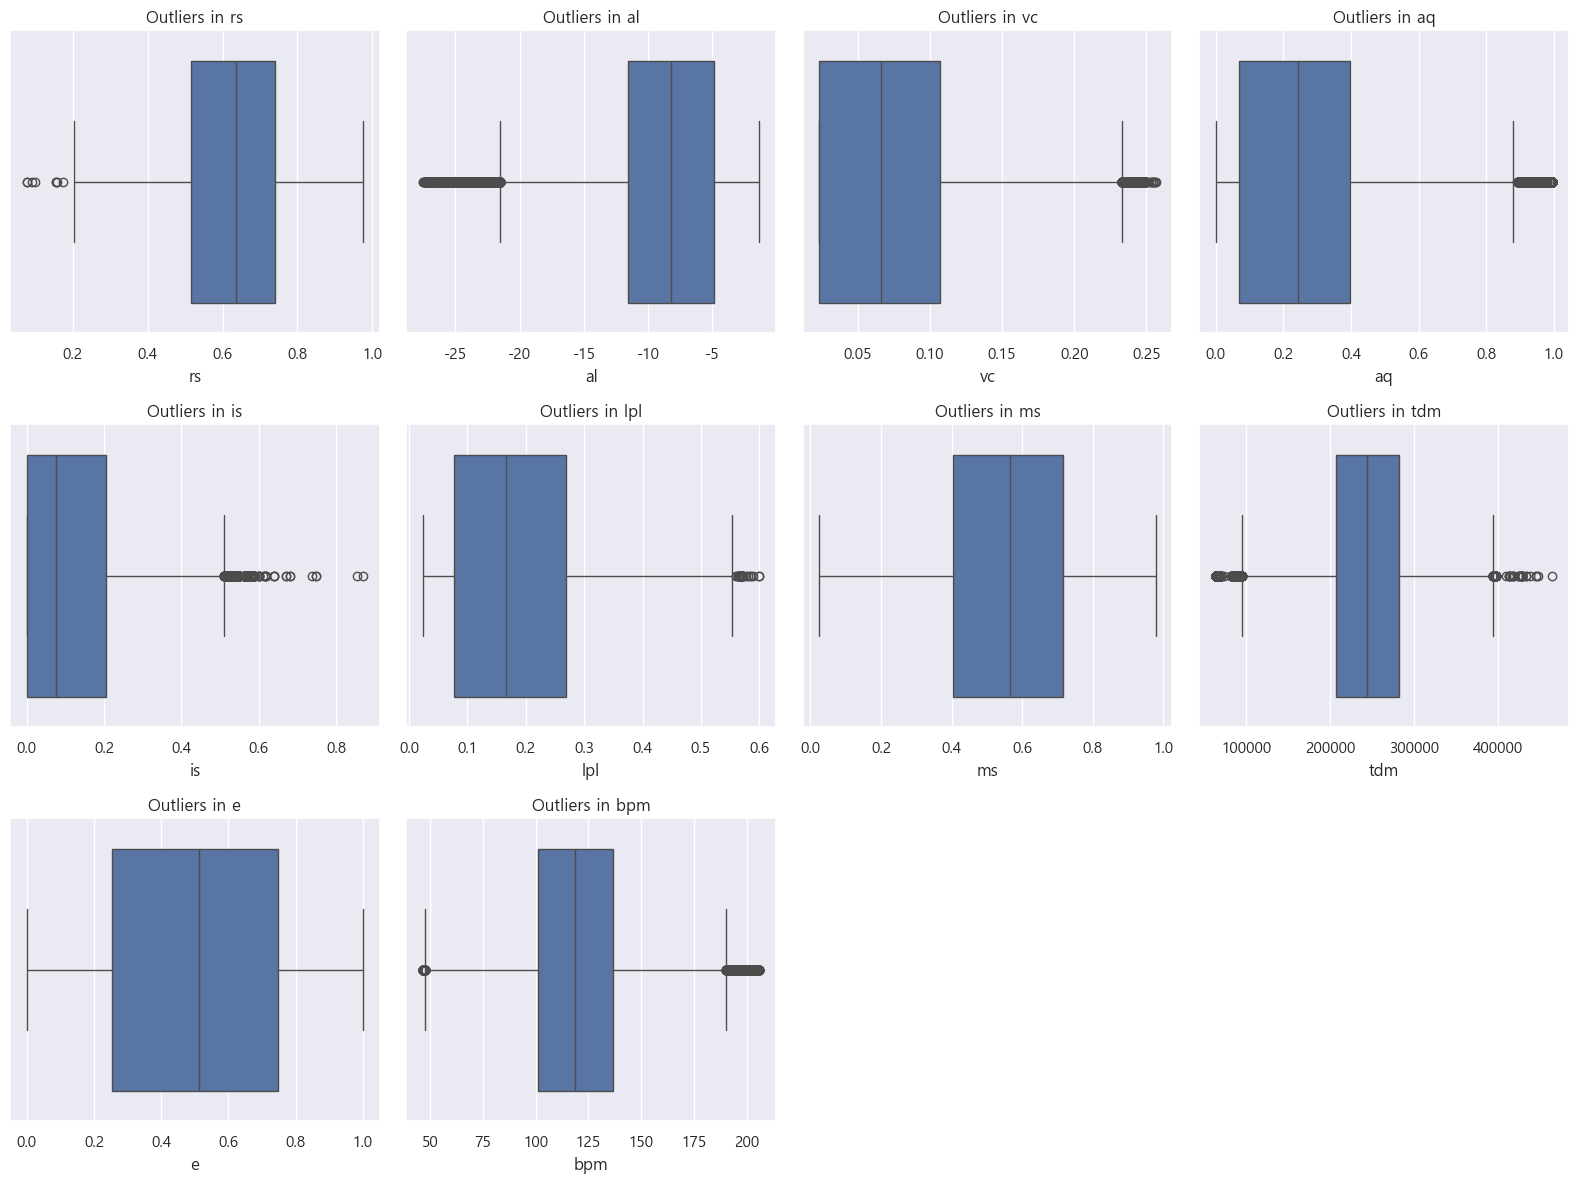

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

In [29]:
# IQR 기반 이상치 행 삭제 코드

import pandas as pd
import numpy as np

# 1. 원본 DataFrame을 안전하게 복사
df_trimmed = df.copy()

# 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# 예시: num_features = ['age', 'income', 'score']
# 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()

# 3. 각 숫자형 특성에 대해 이상치 행 삭제
for col in num_features:
    Q1 = df_trimmed[col].quantile(0.25)
    Q3 = df_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 정상 범위에 있는 행만 남김
    df_trimmed = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)]

# 4. 결과 확인
print("Original DataFrame Shape:", df.shape)
print("Trimmed DataFrame Shape:", df_trimmed.shape)

Original DataFrame Shape: (524164, 10)
Trimmed DataFrame Shape: (505206, 10)


In [30]:
# # IQR 기반 이상치 대체(Winsorization) 코드

# import pandas as pd
# import numpy as np

# # 1. 원본 DataFrame을 안전하게 복사
# df_winsorized = df.copy()

# # 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# # 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
# num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()

# # 3. 복사본(df_winsorized)의 이상치를 경계값으로 대체
# for col in num_features:
#     Q1 = df_winsorized[col].quantile(0.25)
#     Q3 = df_winsorized[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Winsorization (capping)
#     df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound,
#                                   np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col]))

# # 4. 결과 확인
# print("Original DataFrame Shape:", df.shape)
# print("Winsorized DataFrame Shape:", df_winsorized.shape)
# # df_winsorized.describe() # 데이터가 어떻게 변했는지 확인

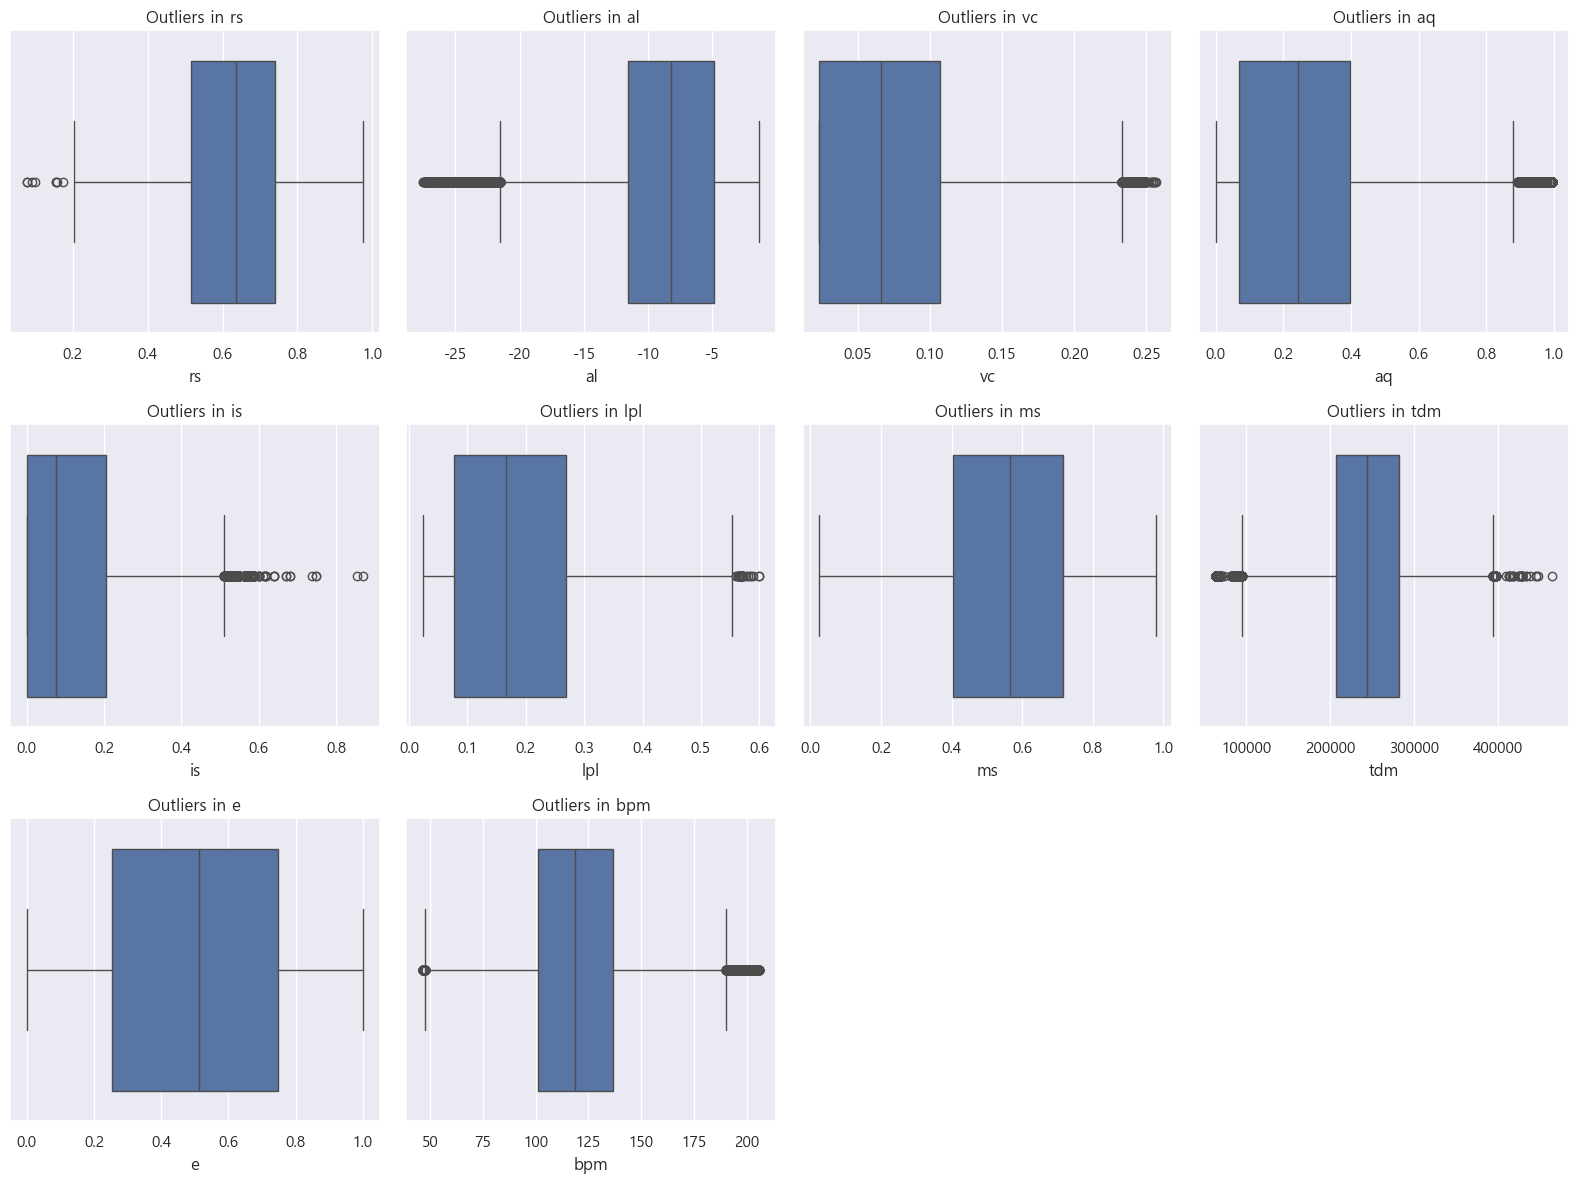

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()